**Remark**

This note is mostly prepared by my past student, my friend: [Click on him!](https://www.linkedin.com/in/minh-vu-chau/?originalSubdomain=lu)

# Goal

Choose
- An input vector $\mathbf{x} \in \mathbb{R}^{b \times n} $.
- An output vector $\mathbf{y} = f(\mathbf{X}) \in \mathbb{R}^{b \times l} $
- A function $f(\mathbf{X}): \mathbb{R}^{b \times n} \rightarrow \mathbb{R}^{b \times l}$

$b:$ number of examples; $n, l$ are number of columns of inputs and ouputs repectively.

We want to compute the Jacobian matrix $ J_f(\mathbf{X}) \in \mathbb{R}^{(b \times l \times n)} $.
$$
J_f(\mathbf{X}) = [J_f^1, J_f^2, \dots, J_f^b]^\top. $$
One example of $J_f(\mathbf{X}) \in \mathbb{R}^{l \times n}$ at row $i$ is:
$$
J_f^i(\mathbf{X}) = \frac{\partial \mathbf{y}^i}{\partial \mathbf{X}^i} = \begin{bmatrix}
\frac{\partial y_1}{\partial x_1} & \cdots & \frac{\partial y_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_l}{\partial x_1} & \cdots & \frac{\partial y_l}{\partial x_n} \\
\end{bmatrix} \in \mathbb{R}^{l \times n}
$$

However, instead of calculating the full Jacobian explicitly, we use the **Jacobian-Vector Product (JVP)** to get the **partial derivatives** for each input column. Mathematically, the VJP is defined as:
$$
J_f^i(\mathbf{x}) \mathbf{v}^T = \left( \sum_{i=1}^l v_i \frac{\partial y_i}{\partial x_1}, \ldots, \sum_{i=1}^l v_i \frac{\partial y_i}{\partial x_n} \right)
$$
This results in a vector in $\mathbb{R}^n $representing a **weighted sum of the rows** of the Jacobian matrix. The VJP allows the gradients to be computed efficiently without constructing the full Jacobian matrix.


#### If, $\mathbf{v}$ is replace with $I_n \in \mathbb{R}^{n \times n}$, then JVP is the jacobian matrix.
$$  J_f^i(\mathbf{x}) \mathbf{I} = J_f^i(\mathbf{x}) $$


In [1]:
# @title
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

# Define an example outputs function
def function_2d(X):
    """Compute 2D vector-valued function."""
    if not isinstance(X, torch.Tensor):
        X = torch.from_numpy(X)
    f1 = X[:, 0]**3 + 0.1 * X[:, 0] * X[:, 1]**2
    f2 = X[:, 1]**3 + 0.5 * X[:, 1] * X[:, 0]**2
    return torch.column_stack((f1, f2))  # Stack the functions as columns


def _plot_scatter(ax, x, f, z_label, x_label):
    """Helper function to create a scatter plot with original and noisy data."""
    ax.plot(x, f, linewidth=2, label=z_label)
    ax.set_title(f'{x_label} vs {z_label}')
    ax.set_xlabel(x_label)
    ax.set_ylabel(z_label)
    ax.legend()
    ax.grid(True)


def plot_data_2D(X, f, output_file='data_plot_2D.png'):
    """Plot 2D and 3D vector-valued function data."""
    X1, X2 = np.meshgrid(X[:, 0], X[:, 1])
    X_ = np.column_stack((X1.ravel(), X2.ravel()))
    Z = function_2d(X_)

    U, V = Z[:, 0].numpy(), Z[:, 1].numpy()
    magnitude = np.sqrt(U**2 + V**2)

    fig, axs = plt.subplots(2, 2, figsize=(8, 8))

    # Quiver plot of original function
    axs[0, 0].quiver(X1, X2, U.reshape(X1.shape), V.reshape(X2.shape), magnitude.reshape(X1.shape), cmap='viridis')
    axs[0, 0].set_title('Original Vector Field')
    axs[0, 0].set_xlabel(r'$x$')
    axs[0, 0].set_ylabel(r'$y$')
    axs[0, 0].grid(True)

    # 3D surface plot of the vector field magnitude
    axs[0, 1] = fig.add_subplot(222, projection='3d')
    axs[0, 1].plot_surface(X1, X2, magnitude.reshape(X1.shape), cmap='viridis')
    axs[0, 1].set_title('3D Surface of Vector Field Magnitude')
    axs[0, 1].set_xlabel(r'$x$')
    axs[0, 1].set_ylabel(r'$y$')
    axs[0, 1].set_zlabel('Magnitude')


    _plot_scatter(axs[1, 0], X[:,0], f[:, 0].numpy(), r'$f_1$', r'$x_1$')

    _plot_scatter(axs[1, 1], X[:,1], f[:, 1].numpy(), r'$f_2$', r'$x_2$')

    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()



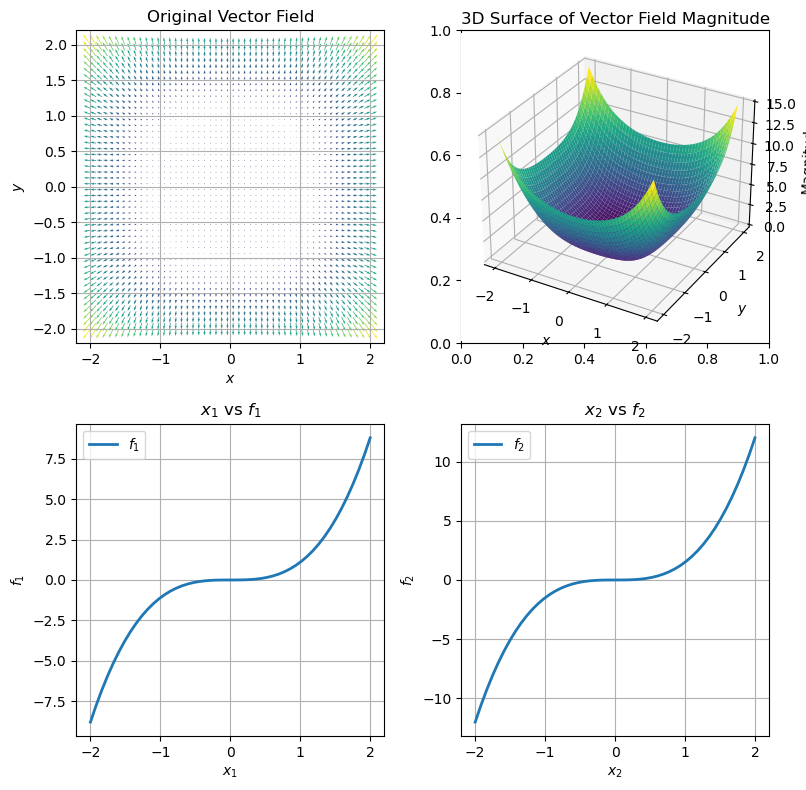

In [2]:
# Define inputs and an example outputs function
b, n, l = 50, 2, 2
x1 = np.linspace(-2, 2, b)
x2 = np.linspace(-2, 2, b)
X = np.column_stack((x1, x2))

f = function_2d(X)
plot_data_2D(X, f)



### Examples

Pick a function takes a 2D input matrix $X \in \mathbb{R}^{b \times 2}$ and returns a 2D output matrix $\mathbf{f}(X) \in \mathbb{R}^{b \times 2}$, where each row is a 2D vector computed from the input values in that row.

Given:
- $X[:, 0] = x_1$, the first component of each input row
- $X[:, 1] = x_2$, the second component of each input row

The function computes two output components $f_1 $and $f_2$ as:
$$
f_1(x_1, x_2) = x_1^3 + 0.1 \cdot x_1 \cdot x_2^2 \\
f_2(x_1, x_2) = x_2^3 + 0.5 \cdot x_2 \cdot x_1^2
$$

Thus, for each input row $(x_1, x_2)$, the output row is (the notation $i$ is ommited for simplicity, generaly we can use `vmap` to compute all the example):
$$
\mathbf{f}(x_1, x_2) = \begin{bmatrix} f_1(x_1, x_2) &
 f_2(x_1, x_2) \end{bmatrix}
= \begin{bmatrix} x_1^3 + 0.1 \cdot x_1 \cdot x_2^2  &
 x_2^3 + 0.5 \cdot x_2 \cdot x_1^2 \end{bmatrix}
$$

### Jacobian of $\mathbf{f}(x_1, x_2)$

The **Jacobian matrix** of this function with respect to $(x_1, x_2)$ is:
$$
J_f(x_1, x_2) = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}
\end{bmatrix}
=
\begin{bmatrix}
3 x_1^2 + 0.1 \cdot x_2^2 & x_1 \cdot x_2 \\
0.2 \cdot x_1 \cdot x_2 & 3 x_2^2 + 0.5 \cdot x_1^2
\end{bmatrix}
$$

In [3]:
def jacobian_reference(X):
  """
  Compute the Jacobian matrix of the function.

  Args:
    X (torch.Tensor): A tensor of shape (b, 2) representing the input values
                     x1 and x2 in each row.

  Returns:
    torch.Tensor: A tensor of shape (b, 2, 2) representing the Jacobian
                  matrix for each input row.
  """
  x1 = X[:, 0]  # Extract x1 values
  x2 = X[:, 1]  # Extract x2 values

  # Compute the elements of the Jacobian matrix
  df1_dx = torch.stack([3 * x1**2 + 0.1 * x2**2, 0.2 * x1 * x2], dim=1)
  df2_dx = torch.stack([x1 * x2, 3 * x2**2 + 0.5 * x1**2], dim=1)
  return torch.stack([df1_dx, df2_dx], dim=1)


### Computing the Jacobian Efficiently with JVP

Now let’s relate this to the theory and codes we discussed earlier, which computes each column of the Jacobian using the **Jacobian-Vector Product (JVP)**.

1. **JVP for Each Input Column**:

Pick $\mathbf{v}_1 = \begin{bmatrix} 1 & 0 \end{bmatrix}^T$ and $\mathbf{v}_2 = \begin{bmatrix} 0 & 1 \end{bmatrix}^T$

*Derivative with respect to* $x_1$:
$$
J_f^1(x_1, x_2) = J_f(x_1, x_2) \begin{bmatrix}1 \\[6pt] 0 \end{bmatrix}
=
\begin{bmatrix} \displaystyle \frac{\partial f_1}{\partial x_1} \\[12pt] \displaystyle\frac{\partial f_2}{\partial x_1} \end{bmatrix}
=
\begin{bmatrix} 3 x_1^2 + 0.1 x_2^2 \\[6pt] x_1 x_2 \end{bmatrix}
$$
    
*Derivative with respect to $x_2$*:
$$
J_f^2(x_1, x_2) =
J_f(x_1, x_2) \begin{bmatrix} 0 \\[6pt] 1 \end{bmatrix} = \begin{bmatrix} \displaystyle\frac{\partial f_1}{\partial x_2} \\[12pt] \displaystyle\frac{\partial f_2}{\partial x_2} \end{bmatrix} = \begin{bmatrix} 0.2 x_1 x_2 \\[6pt] 3 x_2^2 + 0.5 x_1^2 \end{bmatrix}
$$

2. **Constructing the Full Jacobian Tensor**:
After computing these partial derivatives for each $j$-th input variable, we store them in the corresponding slice of the `derivatives` tensor. The result is a tensor of shape $(m, 2, 2)$, where each submatrix contains the Jacobian matrix $J_f(x_1, x_2)$ for each input row $(x_1, x_2)$.


In [4]:
def compute_jvp_derivatives(inputs, outputs_fn):
    """
    Compute derivatives for multiple inputs and outputs using JVP.

    Args:
        inputs (torch.Tensor): An b x n tensor of inputs, requires_grad=True.
        outputs_fn (function): A function that computes outputs of shape b x l given inputs.

    Returns:
        torch.Tensor: Derivatives of shape (b, l, n), representing the partial derivatives
                      of each output with respect to each input.
    """
    inputs = inputs.clone().detach().requires_grad_(True)
    outputs = outputs_fn(inputs)  # Should return an b x l tensor

    # Initialize storage
    b, l = outputs.shape
    _, n = inputs.shape
    jacobian = torch.zeros((b, l, n), dtype=inputs.dtype)

    # Compute JVP for each input direction
    for j in range(n):
        v = torch.zeros_like(inputs)
        v[:,j] = 1  # Set only the j-th input direction to 1
        jvp_result = torch.autograd.functional.jvp(lambda x: outputs_fn(x), inputs, v=v)[1]
        jacobian[:, :, j] = jvp_result

    return jacobian # We expect colmns of each J

In [5]:

# Define inputs and an example outputs function
# b, n, l = 2, 2, 2
b, n, l = 50, 2, 2
x1 = np.linspace(-1, 2, b)
x2 = np.linspace(-2, 1, b)
X = np.column_stack((x1, x2))

# Compute the Jacobian using both the reference and JVP methods
X_tensor = torch.tensor(X, dtype=torch.float32)
jacobian_ref = jacobian_reference(X_tensor)
jvp_jacobian = compute_jvp_derivatives(X_tensor, function_2d)

# Print results for comparison
if b < 4:
    print("Reference Jacobian:")
    print(jacobian_ref)

    print("\nJVP Jacobian:")
    print(jvp_jacobian)

print("Check jacobian")
print(torch.allclose(jacobian_ref, jvp_jacobian))

Check jacobian
True
